In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from analysis_functions import Analysis

In [2]:
uqc_100_path = "../../results/acrobot_testing/4qubit_uqc_100"
uqc_250_path = "../../results/acrobot_testing/4qubit_uqc_250"
uqc_500_path = "../../results/acrobot_testing/4qubit_uqc_500"
uqc_1000_path = "../../results/acrobot_testing/4qubit_uqc"

uqc_100 = Analysis(uqc_100_path)
uqc_250 = Analysis(uqc_250_path)
uqc_500 = Analysis(uqc_500_path)
uqc_1000 = Analysis(uqc_1000_path)

In [3]:
uqc_100_return = uqc_100.get_rewards()
uqc_250_return = uqc_250.get_rewards()
uqc_500_return = uqc_500.get_rewards()
uqc_1000_return = uqc_1000.get_rewards()

uqc_100_mean = np.mean(uqc_100_return, axis=0)
uqc_250_mean = np.mean(uqc_250_return, axis=0)
uqc_500_mean = np.mean(uqc_500_return, axis=0)
uqc_1000_mean = np.mean(uqc_1000_return, axis=0)

uqc_100_std = np.std(uqc_100_return, axis=0)
uqc_250_std = np.std(uqc_250_return, axis=0)
uqc_500_std = np.std(uqc_500_return, axis=0)
uqc_1000_std = np.std(uqc_1000_return, axis=0)

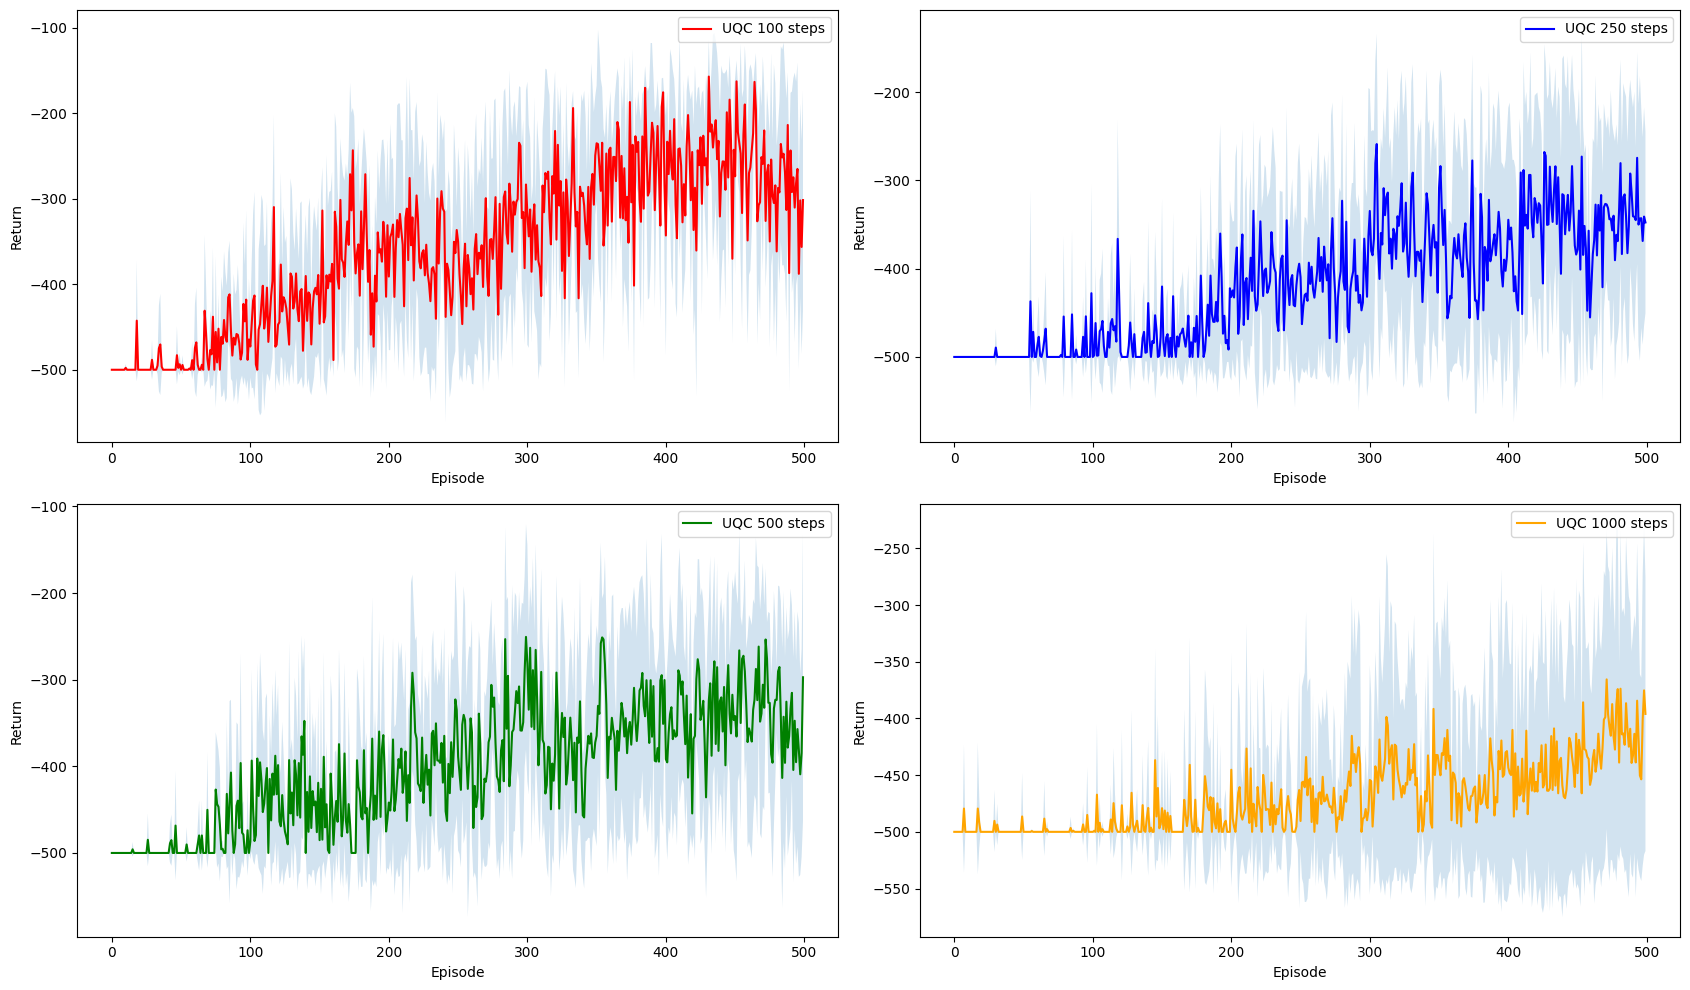

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(17, 10), tight_layout = True)

axs[0,0].plot(uqc_100_mean, color = "red", label="UQC 100 steps")
axs[0,0].fill_between(np.arange(len(uqc_100_mean)), uqc_100_mean - uqc_100_std, uqc_100_mean + uqc_100_std, alpha=0.2)
axs[0,0].set_xlabel("Episode")
axs[0,0].set_ylabel("Return")
axs[0,0].legend()

axs[0,1].plot(uqc_250_mean,color = "blue", label="UQC 250 steps")
axs[0,1].fill_between(np.arange(len(uqc_250_mean)), uqc_250_mean - uqc_250_std, uqc_250_mean + uqc_250_std, alpha=0.2)
axs[0,1].set_xlabel("Episode")
axs[0,1].set_ylabel("Return")
axs[0,1].legend()

axs[1,0].plot(uqc_500_mean,color = "green", label="UQC 500 steps")
axs[1,0].fill_between(np.arange(len(uqc_500_mean)), uqc_500_mean - uqc_500_std, uqc_500_mean + uqc_500_std, alpha=0.2)
axs[1,0].set_xlabel("Episode")
axs[1,0].set_ylabel("Return")
axs[1,0].legend()

axs[1,1].plot(uqc_1000_mean,color = "orange", label="UQC 1000 steps")
axs[1,1].fill_between(np.arange(len(uqc_1000_mean)), uqc_1000_mean - uqc_1000_std, uqc_1000_mean + uqc_1000_std, alpha=0.2)
axs[1,1].set_xlabel("Episode")
axs[1,1].set_ylabel("Return")
axs[1,1].legend()

plt.show()

In [8]:
uqc_100_mean_gradients, uqc_100_mean_variance, uqc_100_max, uqc_100_index_mas, uqc_100_min, uqc_100_index_min = uqc_100.calculate_mean_variance_gradients(return_max = True, return_min = True)
uqc_250_mean_gradients, uqc_250_mean_variance, uqc_250_max, uqc_250_index_mas, uqc_250_min, uqc_250_index_min = uqc_250.calculate_mean_variance_gradients(return_max = True, return_min = True)
uqc_500_mean_gradients, uqc_500_mean_variance, uqc_500_max, uqc_500_index_mas, uqc_500_min, uqc_500_index_min = uqc_500.calculate_mean_variance_gradients(return_max = True, return_min = True)
#uqc_1000_mean_gradients, uqc_1000_mean_variance, uqc_1000_max, uqc_1000_index_mas, uqc_1000_min, uqc_1000_index_min = uqc_1000.calculate_mean_variance_gradients(return_max = True, return_min = True)

uqc_100_mean_gradients_smoothed = pd.Series(uqc_100_mean_gradients).rolling(250).mean()
uqc_250_mean_gradients_smoothed = pd.Series(uqc_250_mean_gradients).rolling(250).mean()
uqc_500_mean_gradients_smoothed = pd.Series(uqc_500_mean_gradients).rolling(250).mean()
#uqc_1000_mean_gradients_smoothed = pd.Series(uqc_1000_mean_gradients).rolling(250).mean()

uqc_100_mean_variance_smoothed = pd.Series(uqc_100_mean_variance).rolling(250).mean()
uqc_250_mean_variance_smoothed = pd.Series(uqc_250_mean_variance).rolling(250).mean()
uqc_500_mean_variance_smoothed = pd.Series(uqc_500_mean_variance).rolling(250).mean()
#uqc_1000_mean_variance_smoothed = pd.Series(uqc_1000_mean_variance).rolling(250).mean()

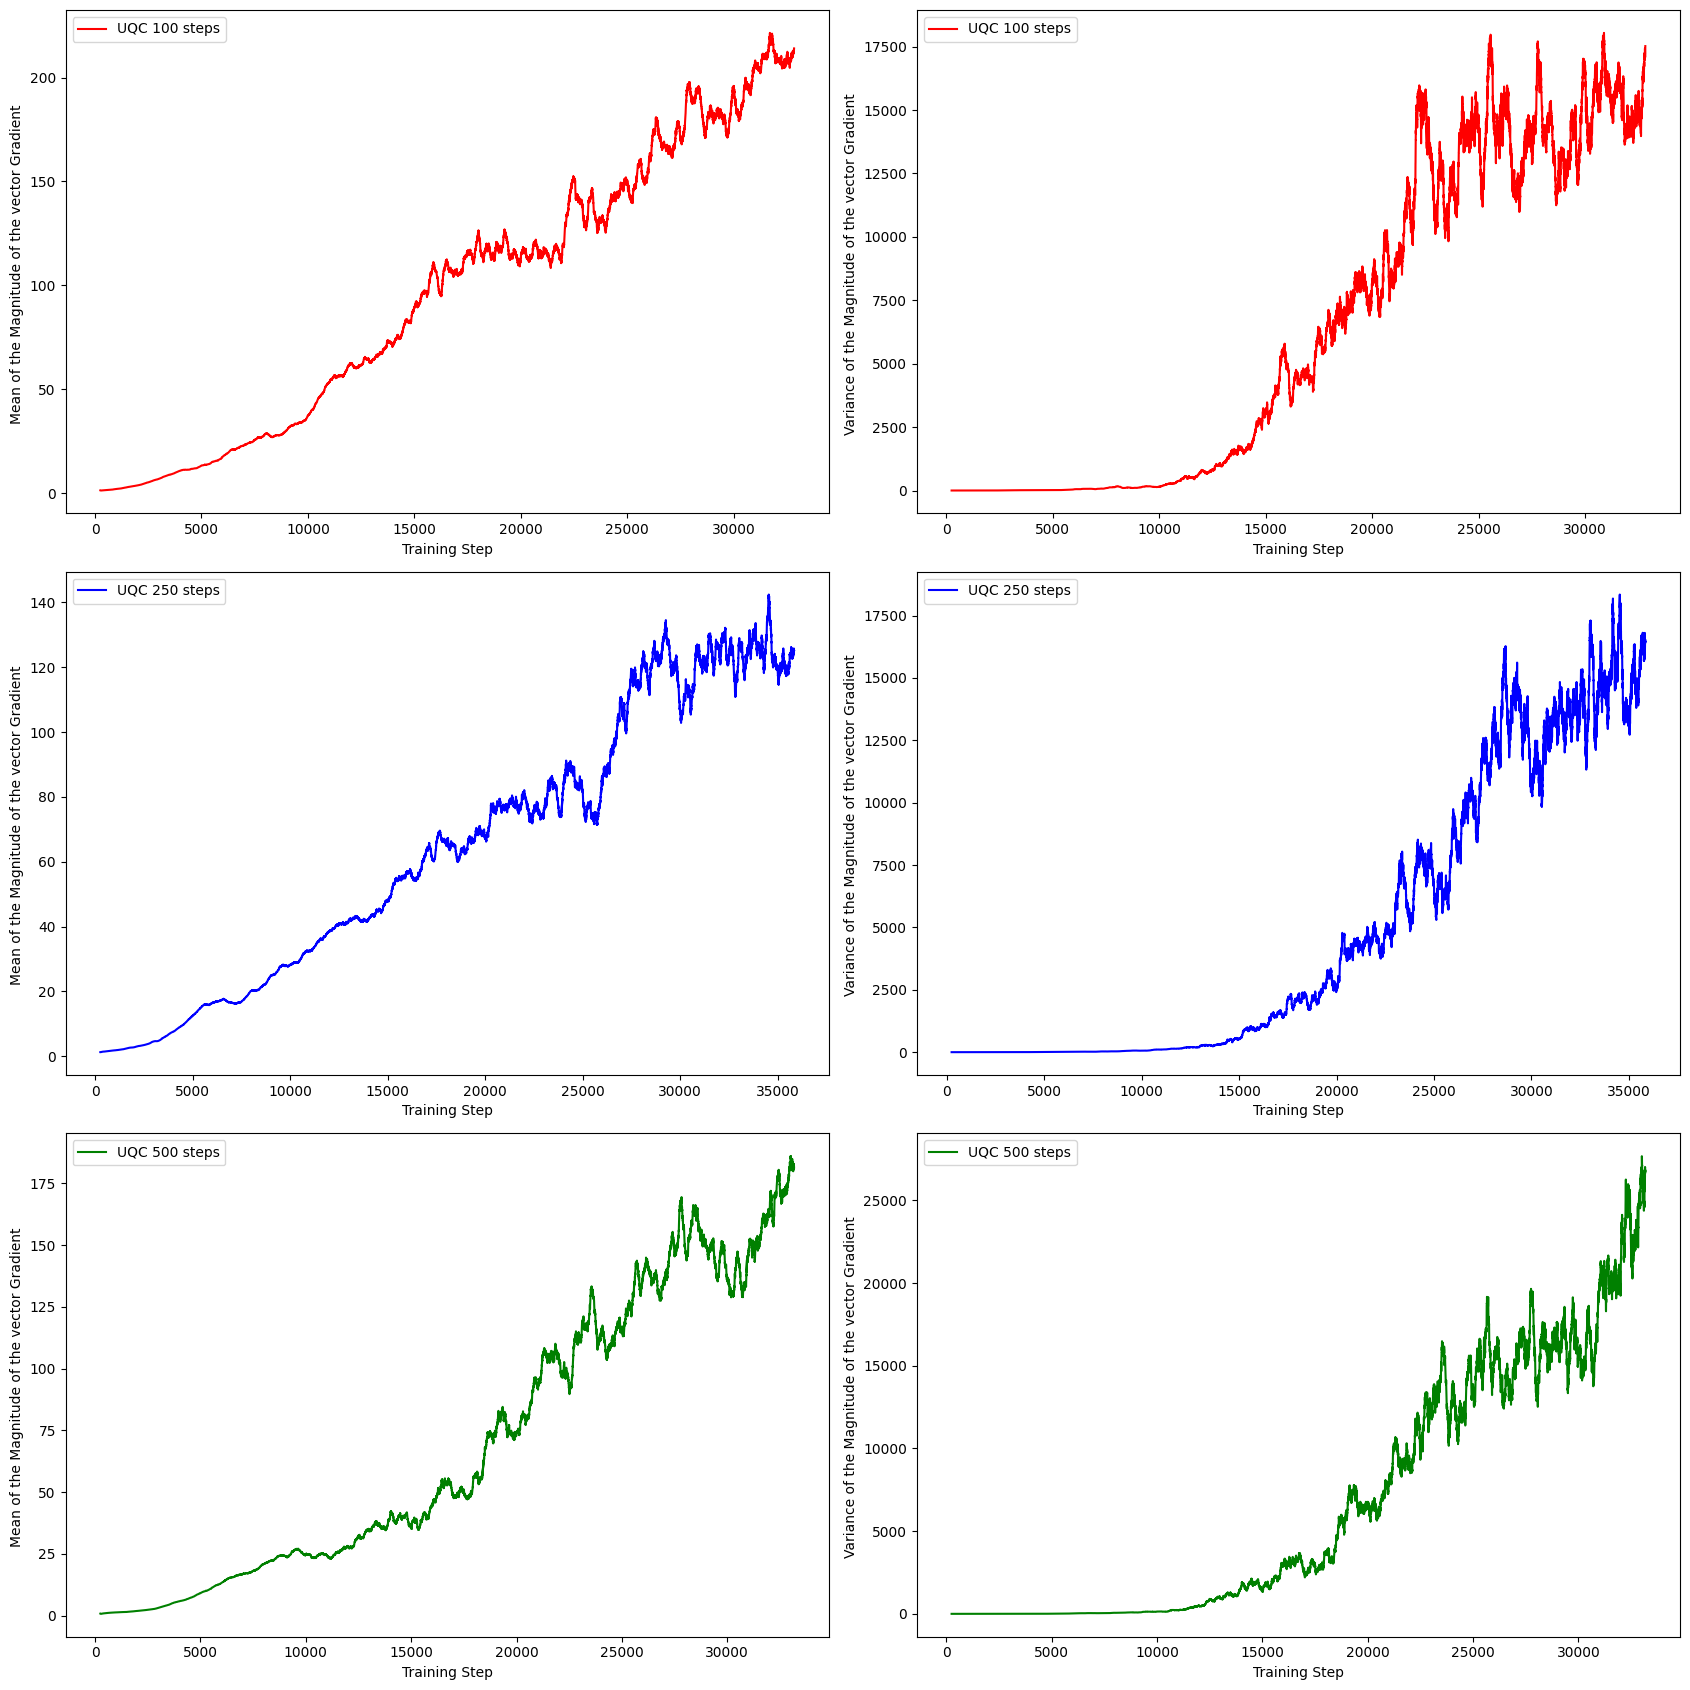

In [9]:
fig, axs = plt.subplots(3, 2, figsize=(17, 17), tight_layout = True)

axs[0,0].plot(uqc_100_mean_gradients_smoothed, color = "red", label="UQC 100 steps")
axs[0,0].set_xlabel("Training Step")
axs[0,0].set_ylabel("Mean of the Magnitude of the vector Gradient ")
axs[0,0].legend()

axs[0,1].plot(uqc_100_mean_variance_smoothed,color = "red", label="UQC 100 steps")
axs[0,1].set_xlabel("Training Step")
axs[0,1].set_ylabel("Variance of the Magnitude of the vector Gradient ")
axs[0,1].legend()

axs[1,0].plot(uqc_250_mean_gradients_smoothed,color = "blue", label="UQC 250 steps")
axs[1,0].set_xlabel("Training Step")
axs[1,0].set_ylabel("Mean of the Magnitude of the vector Gradient ")
axs[1,0].legend()

axs[1,1].plot(uqc_250_mean_variance_smoothed,color = "blue", label="UQC 250 steps")
axs[1,1].set_xlabel("Training Step")
axs[1,1].set_ylabel("Variance of the Magnitude of the vector Gradient ")
axs[1,1].legend()

axs[2,0].plot(uqc_500_mean_gradients_smoothed,color = "green", label="UQC 500 steps")
axs[2,0].set_xlabel("Training Step")
axs[2,0].set_ylabel("Mean of the Magnitude of the vector Gradient ")
axs[2,0].legend()

axs[2,1].plot(uqc_500_mean_variance_smoothed,color = "green", label="UQC 500 steps")
axs[2,1].set_xlabel("Training Step")
axs[2,1].set_ylabel("Variance of the Magnitude of the vector Gradient ")
axs[2,1].legend()

plt.show()